In [1]:
data(cheddar, package="faraway")

In [2]:
head(cheddar)

taste,Acetic,H2S,Lactic
12.3,4.543,3.135,0.86
20.9,5.159,5.043,1.53
39.0,5.366,5.438,1.57
47.9,5.759,7.496,1.81
5.6,4.663,3.807,0.99
25.9,5.697,7.601,1.09


In [11]:
lm.fit <- lm(taste ~ Acetic + H2S + Lactic, data=cheddar)

In [12]:
faraway::sumary(lm.fit)

             Estimate Std. Error t value Pr(>|t|)
(Intercept) -28.87677   19.73542 -1.4632 0.155399
Acetic        0.32774    4.45976  0.0735 0.941980
H2S           3.91184    1.24843  3.1334 0.004247
Lactic       19.67054    8.62905  2.2796 0.031079

n = 30, p = 4, Residual SE = 10.13071, R-Squared = 0.65


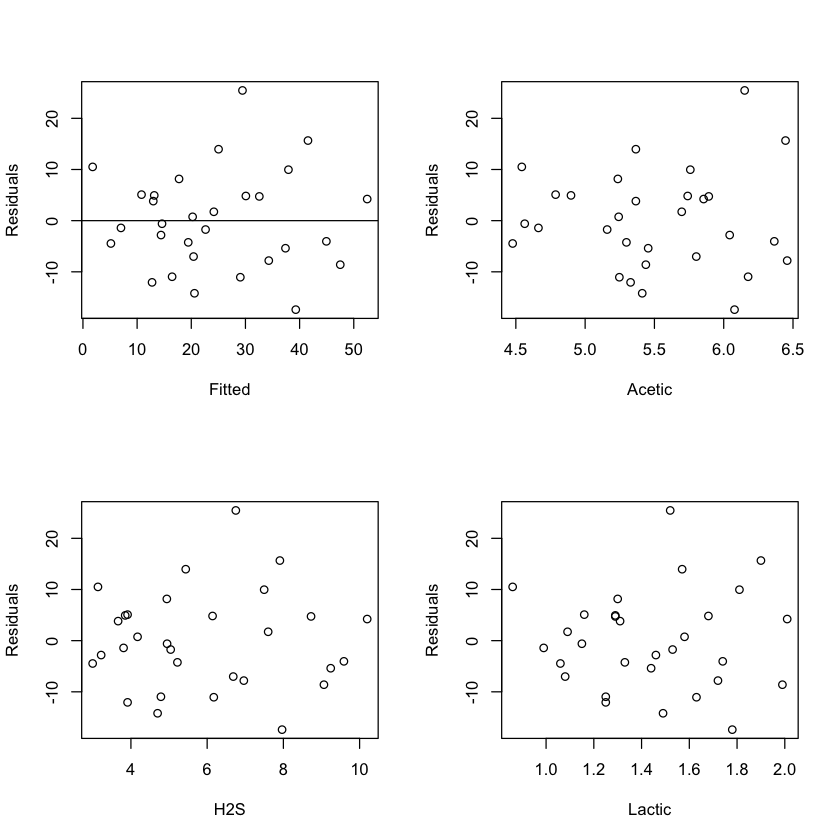

In [13]:
par(mfrow = c(2,2))
plot(lm.fit$fit, lm.fit$res,xlab="Fitted", ylab="Residuals")
abline(h=0)
plot(cheddar$Acetic, lm.fit$res, xlab="Acetic", ylab="Residuals")
plot(cheddar$H2S, lm.fit$res, xlab="H2S", ylab="Residuals")
plot(cheddar$Lactic, lm.fit$res, xlab="Lactic", ylab="Residuals")

In [14]:
lm.adj <- lm(taste ~ Acetic + H2S + Lactic + I(Acetic^2), data=cheddar)

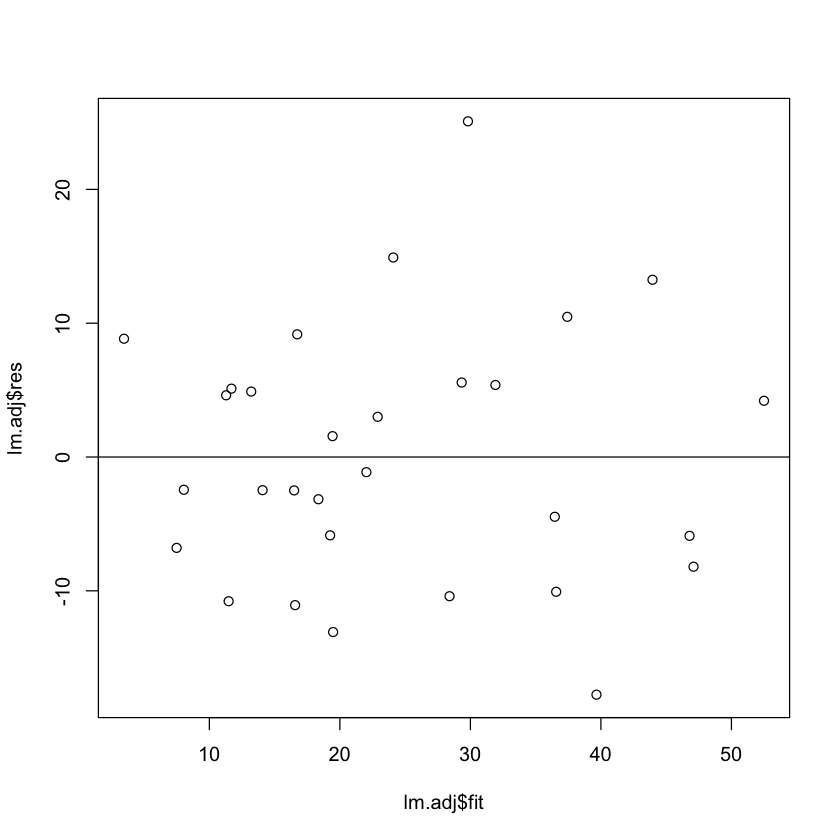

In [16]:
plot(lm.adj$fit, lm.adj$res)
abline(h=0)

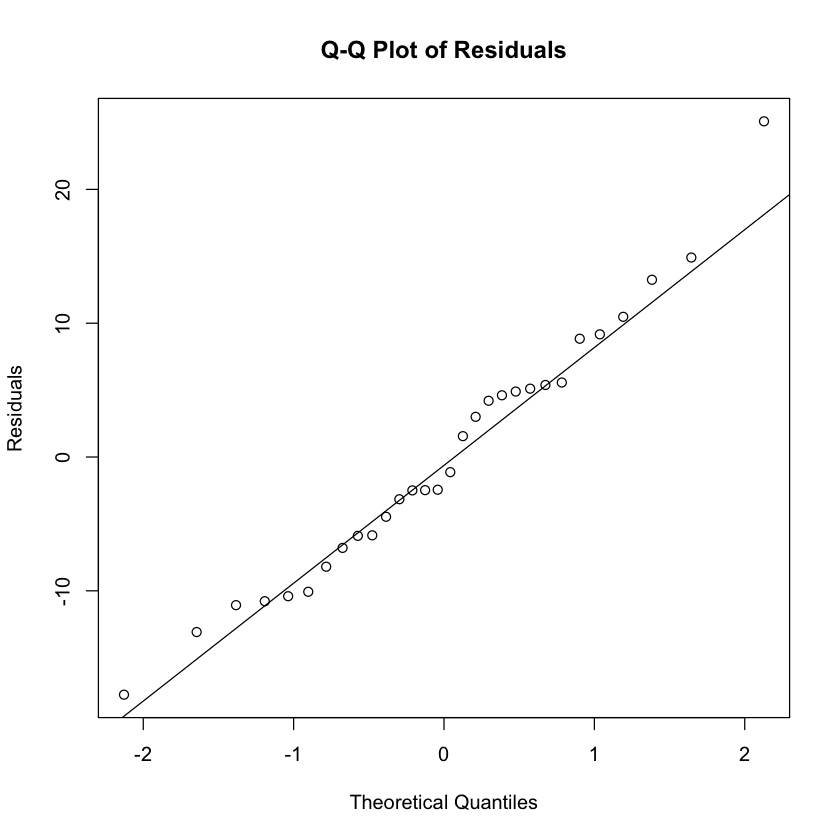

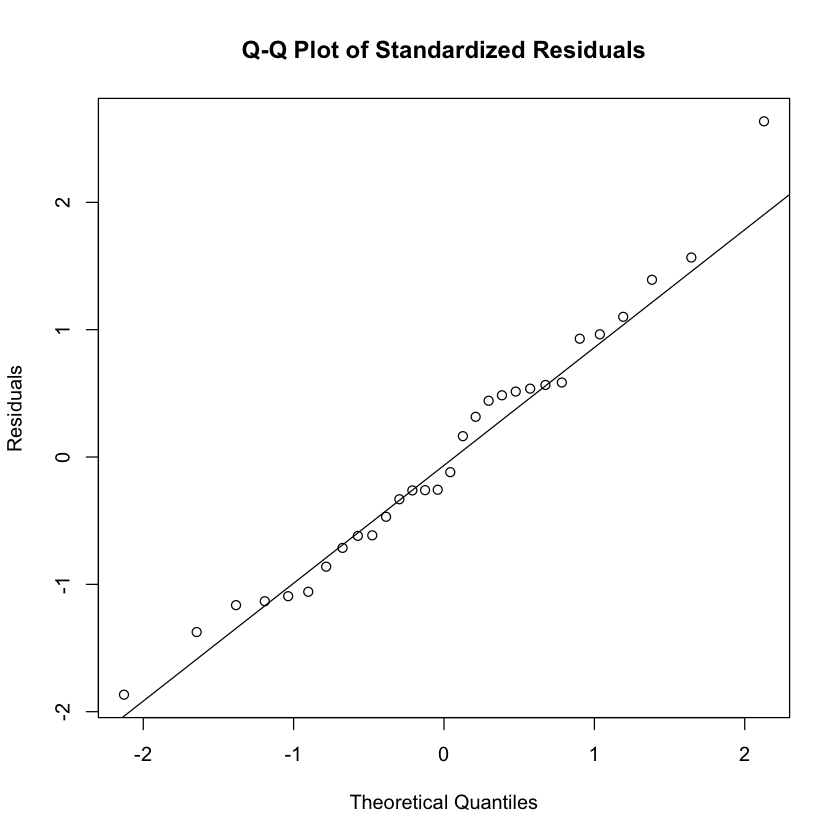

In [39]:

qqnorm(residuals(lm.adj),ylab="Residuals",main="Q-Q Plot of Residuals")
qqline(residuals(lm.adj))

qqnorm(scale( residuals(lm.adj),center = TRUE, scale = TRUE),ylab="Residuals",main="Q-Q Plot of Standardized Residuals")
qqline(scale( residuals(lm.adj),center = TRUE, scale = TRUE) )

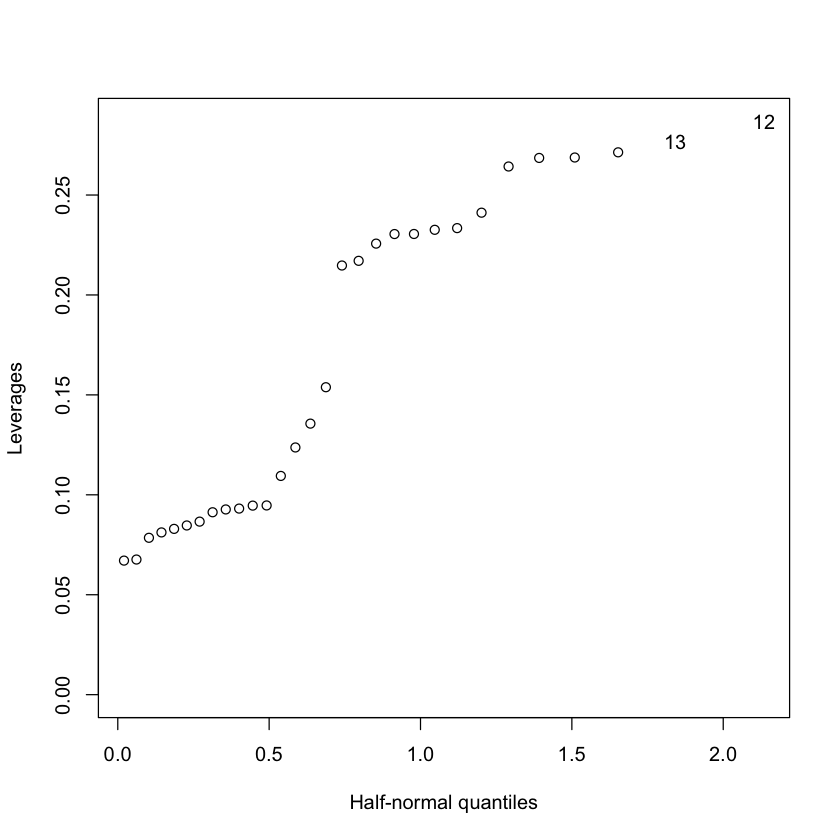

In [30]:
halfnorm(lm.influence(lm.adj)$hat,labs=row.names(cheddar),ylab="Leverages")

In [43]:
hatv <- hatvalues(lm.adj)
lev.cut <- 5 *2 * 1/ nrow(cheddar)

high.leverage <- cheddar[hatv > lev.cut,]
high.leverage

taste,Acetic,H2S,Lactic


In [20]:
jack<-rstudent(lm.adj)
jack[order(abs(jack),decreasing=TRUE)][1:5]

15         8        12         3        18 
 2.935884 -1.906227  1.575185  1.560482 -1.361455

In [24]:
require(faraway)

Loading required package: faraway


In [36]:
studentized.residuals <- rstudent(lm.adj)
max.residual <- studentized.residuals[which.max(abs(studentized.residuals))]
range.residuals <- range(studentized.residuals)
names(range.residuals) <- c("left", "right")

p<-5
n<-nrow(cheddar)
t.val.alpha <- qt(.05/(n*2),n-p-1)


In [48]:
data.frame(range.residuals=t(range.residuals))
data.frame(t.val.alpha = t.val.alpha)

range.residuals.left,range.residuals.right
-1.906227,2.935884


t.val.alpha
-3.540469


In [51]:
cook.distances <-data.frame( cooks.distance(lm.adj))
names(cook.distances) <- "cook.distance"
mean.cooks.distance <- mean(cook.distances$cook.distance)
influential.points <- cook.distances[cook.distances$cook.distance > 3*mean.cooks.distance,,drop=FALSE]
influential.points

,cook.distance
12,0.1884604
15,0.1356513
